In [19]:
import random
import matplotlib
import matplotlib.pyplot as plt
from numpy import array
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split #to split to test and train set
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
df=pd.read_csv("/Users/manikhossain/Downloads/SOEN-6111_BigData_Materials/SOEN6111_project/dataset/iot_telemetry_data.csv")

In [22]:
# investigation for duplicates
df.shape
#(405184, 9)

df.drop_duplicates().shape
#405171 rows × 9 columns

# same values were recorded twice => we will drop these 14 duplicates 
df[df.duplicated(keep=False) == True]

,ts,device,co,humidity,light,lpg,motion,smoke,temp
17986,1.594543e+09,1c:bf:ce:15:ec:4d,0.004078,74.199997,True,0.006644,False,0.017556,24.700001
17987,1.594543e+09,1c:bf:ce:15:ec:4d,0.004078,74.199997,True,0.006644,False,0.017556,24.700001
82094,1.594653e+09,1c:bf:ce:15:ec:4d,0.004310,61.700001,True,0.006916,False,0.018325,23.700001
82095,1.594653e+09,1c:bf:ce:15:ec:4d,0.004310,61.700001,True,0.006916,False,0.018325,23.700001
147646,1.594765e+09,b8:27:eb:bf:9d:51,0.005336,48.600000,False,0.008071,False,0.021610,22.600000
147647,1.594765e+09,b8:27:eb:bf:9d:51,0.005336,48.600000,False,0.008071,False,0.021610,22.600000
155596,1.594778e+09,b8:27:eb:bf:9d:51,0.005370,46.400000,False,0.008108,False,0.021716,22.500000
155597,1.594778e+09,b8:27:eb:bf:9d:51,0.005370,46.400000,False,0.008108,False,0.021716,22.500000
169439,1.594802e+09,1c:bf:ce:15:ec:4d,0.004009,54.900002,True,0.006563,False,0.017327,24.400000
169440,1.594802e+09,1c:bf:ce:15:ec:4d,0.004009,54.900002,True,0.006563,False,0.017327,24.400000


In [23]:
# drop the duplicates and keep the first occurence only, modify the dataframe
df.drop_duplicates(inplace=True, keep="first")
# verification that there are no duplicates
df[df.duplicated(keep=False) == True]

,ts,device,co,humidity,light,lpg,motion,smoke,temp


In [24]:
# there are no NULL values
df.isna().sum()

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

In [25]:
# how many data points we have per device
df.groupby("device").size()

device
00:0f:00:70:91:0a    111815
1c:bf:ce:15:ec:4d    105913
b8:27:eb:bf:9d:51    187443
dtype: int64

In [26]:
# convert unix epochs to datetime
df["measure_time"]=pd.to_datetime(df["ts"], unit = 's')
df.head(10)

,ts,device,co,humidity,light,lpg,motion,smoke,temp,measure_time
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,2020-07-12 00:01:34.385974407
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,2020-07-12 00:01:34.735567570
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,2020-07-12 00:01:38.073572636
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,2020-07-12 00:01:39.589146137
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,2020-07-12 00:01:41.761234999
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.000000,2020-07-12 00:01:44.468410730
6,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,2020-07-12 00:01:45.448863506
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001,2020-07-12 00:01:46.869076014
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.004345,77.900002,True,0.006957,False,0.018440,27.000000,2020-07-12 00:01:48.275381327
9,1.594512e+09,b8:27:eb:bf:9d:51,0.004970,50.900000,False,0.007667,False,0.020457,22.600000,2020-07-12 00:01:49.136686802


In [27]:
#df["ts"].iloc[0]
#1594512094.3859746
#take the time up to seconds precision
# convert unix epochs to datetime
df["measure_seconds"]=pd.to_datetime(df["ts"].astype(int), unit = 's')

#how many data points we have per sencond
df_entries_sec=df.groupby("measure_seconds").size().reset_index(name="count")

# For an interval of second we can have up to 3 entries
df_entries_sec["count"].max()

3

In [28]:
# what is the proportion of the frequency per second
df_entries_sec.loc[(df_entries_sec['count'] == 3)].count()
#4651 times we receive 3 data entries per second

df_entries_sec.loc[(df_entries_sec['count'] == 2)].count()
#62246 times we received 2 data entries per second

df_entries_sec.loc[(df_entries_sec['count'] == 1)].count()
#266726 -> Most of the data entries are sent at frequency 1 per second

measure_seconds    266726
count              266726
dtype: int64

In [29]:
# do we have long periods without any entries?
import datetime
start_dte = datetime.datetime(2020, 7, 12)
print(start_dte)

#find out the last date
df.loc[(df['measure_time'] >= "2020-07-20")]

end_dte = datetime.datetime(2020, 7, 20, 0, 3, 27)
print(end_dte)

# create date range per second inclusive of the end date
ref_date_range = pd.date_range(start=start_dte, end=end_dte, freq='S')
print(len(ref_date_range))
#691408 seconds in total

missing_seconds =~ref_date_range.isin(df.measure_seconds)
#numpy.ndarray

# approximately half of the times there is no entry
unique, counts = np.unique(missing_seconds, return_counts=True)
dict(zip(unique, counts))
#{False: 333618, True: 357790}

2020-07-12 00:00:00
2020-07-20 00:03:27
691408


{False: 333618, True: 357790}

In [30]:
#select the features and the target variable
#we exclude the timestamp
#?Question? Do we need to add the device?
feature_cols = ['co', 'humidity', 'lpg', 'motion','smoke','temp']
X = df[feature_cols] # Features
y = df['light'] # Target variable

# Train & Test Split() : train=80% & test=20%

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (324136, 6)
Number transactions y_train dataset:  (324136,)
Number transactions X_test dataset:  (81035, 6)
Number transactions y_test dataset:  (81035,)


# Over-sampling using SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [41]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 90050
Before OverSampling, counts of label '0': 234086 

After OverSampling, the shape of train_X: (468172, 6)
After OverSampling, the shape of train_y: (468172,) 

After OverSampling, counts of label '1': 234086
After OverSampling, counts of label '0': 234086


# Gaussian Naive Bayes

In [44]:
classifierGNB = GaussianNB()
classifierGNB.fit(X_train_res, y_train_res)
y_pred = classifierGNB.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     58563
        True       1.00      0.94      0.97     22472

    accuracy                           0.98     81035
   macro avg       0.99      0.97      0.98     81035
weighted avg       0.98      0.98      0.98     81035

[[58508    55]
 [ 1406 21066]]
accuracy is 0.98197075337817


 Normalized Confusion Matrix: Gaussian Naive Bayes   


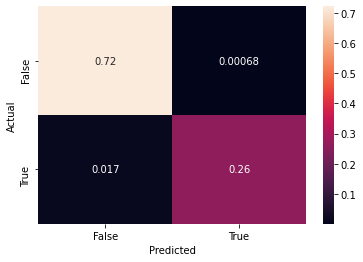

In [45]:
print(' Normalized Confusion Matrix: Gaussian Naive Bayes   ')
confusion_matrixGNB = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], normalize=True)
sns.heatmap(confusion_matrixGNB, annot=True, )
plt.show()

# Multinomial Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB

classifierMNB = MultinomialNB()
classifierMNB.fit(X_train_res, y_train_res)
y_pred = classifierMNB.predict(X_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.80      0.37      0.51     58563
        True       0.32      0.76      0.45     22472

    accuracy                           0.48     81035
   macro avg       0.56      0.56      0.48     81035
weighted avg       0.67      0.48      0.49     81035

[[21782 36781]
 [ 5463 17009]]
accuracy is 0.4786943913123959


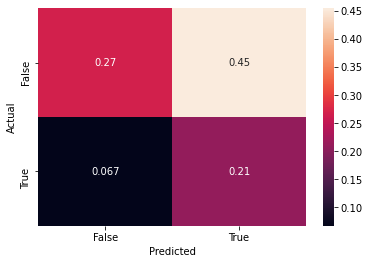

In [47]:
confusion_matrixMNB = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], normalize=True)
sns.heatmap(confusion_matrixMNB, annot=True, )
plt.show()

GaussianNB
****Results****
Accuracy: 98.1971%
Confusion Matrix:
[[58508    55]
 [ 1406 21066]]
MultinomialNB
****Results****
Accuracy: 47.8694%
Confusion Matrix:
[[21782 36781]
 [ 5463 17009]]
BernoulliNB
****Results****
Accuracy: 72.3218%
Confusion Matrix:
[[58537    26]
 [22403    69]]
ComplementNB
****Results****
Accuracy: 47.8694%
Confusion Matrix:
[[21782 36781]
 [ 5463 17009]]


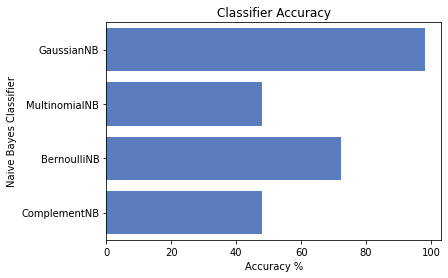

In [49]:
from sklearn.metrics import accuracy_score, log_loss, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB


classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),]
 
# Logging for Visual Comparison
log_cols=["Naive Bayes Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train_res, y_train_res)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, train_predictions))
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Naive Bayes Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()